###ANN Chi2

In [1]:
import pandas as pd
import numpy as np
from google.colab import files

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
dataset = pd.read_csv('drive/MyDrive/data_CKD_MI.csv')

In [51]:
dataset.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48,80,1.020,1,0,0,1,0,0,121,...,44,7800,5.2,1,2,0,0,0,0,0
1,7,50,1.020,4,0,1,1,0,0,121,...,38,6000,4.8,0,1,0,0,0,0,0
2,62,80,1.010,2,3,1,1,0,0,423,...,31,7500,4.8,0,2,0,1,0,1,0
3,48,70,1.005,4,0,1,0,1,0,117,...,32,6700,3.9,1,1,0,1,1,1,0
4,51,80,1.010,2,0,1,1,0,0,106,...,35,7300,4.6,0,1,0,0,0,0,0


In [4]:
# dataset = dataset[['age','bp','al','su','bgr','bu','sc','hemo','pcv','wc','htn','appet','pe','ane','classification']]  #chi2

In [52]:
dataset

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48,80,1.020,1,0,0,1,0,0,121,...,44,7800,5.2,1,2,0,0,0,0,0
1,7,50,1.020,4,0,1,1,0,0,121,...,38,6000,4.8,0,1,0,0,0,0,0
2,62,80,1.010,2,3,1,1,0,0,423,...,31,7500,4.8,0,2,0,1,0,1,0
3,48,70,1.005,4,0,1,0,1,0,117,...,32,6700,3.9,1,1,0,1,1,1,0
4,51,80,1.010,2,0,1,1,0,0,106,...,35,7300,4.6,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.020,0,0,1,1,0,0,140,...,47,6700,4.9,0,1,0,0,0,0,1
396,42,70,1.025,0,0,1,1,0,0,75,...,54,7800,6.2,0,1,0,0,0,0,1
397,12,80,1.020,0,0,1,1,0,0,100,...,49,6600,5.4,0,1,0,0,0,0,1
398,17,60,1.025,0,0,1,1,0,0,114,...,51,7200,5.9,0,1,0,0,0,0,1


In [53]:
dataset.shape

(400, 25)

In [54]:
dataset.iloc[:,-1]

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: classification, Length: 400, dtype: int64

In [55]:
# Data preprocessing
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [56]:
X

array([[48.   , 80.   ,  1.02 , ...,  0.   ,  0.   ,  0.   ],
       [ 7.   , 50.   ,  1.02 , ...,  0.   ,  0.   ,  0.   ],
       [62.   , 80.   ,  1.01 , ...,  1.   ,  0.   ,  1.   ],
       ...,
       [12.   , 80.   ,  1.02 , ...,  0.   ,  0.   ,  0.   ],
       [17.   , 60.   ,  1.025, ...,  0.   ,  0.   ,  0.   ],
       [58.   , 80.   ,  1.025, ...,  0.   ,  0.   ,  0.   ]])

In [57]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [58]:
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import MinMaxScaler

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [60]:
X_train.shape

(300, 24)

In [61]:
scaler = MinMaxScaler()

In [62]:
X_test.shape

(100, 24)

In [63]:
y_test.shape

(100,)

In [64]:
y_test

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0])

In [65]:
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

###ANN

In [ ]:
# # Reshaping X_train for efficient modelling
# X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
# X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [66]:
from keras.models import Sequential
from tensorflow import keras
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
#from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [67]:
import time
start_time = time.time()
#build the model
# sequential
#3 layers firtst 2 nurons and relu function
#output layer 10 nuron softmax function
model = Sequential()
model.add(keras.layers.Dense (15,input_shape=(X_train.shape[1],),activation='relu')) #input layer
model.add(keras.layers.Dense (10,activation='relu')) #hidden
model.add(keras.layers.Dense (1,activation='sigmoid')) #output
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train,y_train,epochs=100,validation_data=(X_test, y_test))
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/100
10/10 [==============================] - 1s 22ms/step - loss: 0.6417 - accuracy: 0.8200 - val_loss: 0.6094 - val_accuracy: 0.9400
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5993 - accuracy: 0.9200 - val_loss: 0.5730 - val_accuracy: 0.9600
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5697 - accuracy: 0.9400 - val_loss: 0.5439 - val_accuracy: 0.9700
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5409 - accuracy: 0.9533 - val_loss: 0.5157 - val_accuracy: 0.9900
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 0.5128 - accuracy: 0.9733 - val_loss: 0.4865 - val_accuracy: 0.9900
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4849 - accuracy: 0.9867 - val_loss: 0.4583 - val_accuracy: 0.9900
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4580 - accuracy: 0.9867 - val_loss: 0.4301 - val_accuracy: 0.9900
Epoch 8/100


###Plot

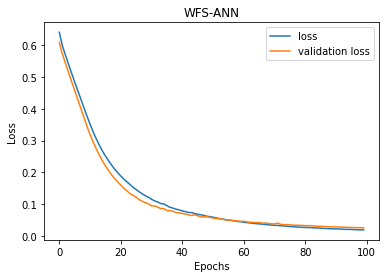

In [68]:
import matplotlib.pyplot as plt

fig = plt.gcf()
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('WFS-ANN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.show()
fig.savefig('WFS-ANN.png', dpi=100)

In [69]:
from google.colab import files
files.download('WFS-ANN.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [70]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

4/4 [==============================] - 0s 3ms/step


In [71]:
from sklearn.metrics import classification_report,confusion_matrix

In [72]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        65
           1       0.95      1.00      0.97        35

    accuracy                           0.98       100
   macro avg       0.97      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [73]:
print(confusion_matrix(y_test,predictions))

[[63  2]
 [ 0 35]]


In [74]:
cnf_matrix = [[63, 2],[0, 35]]

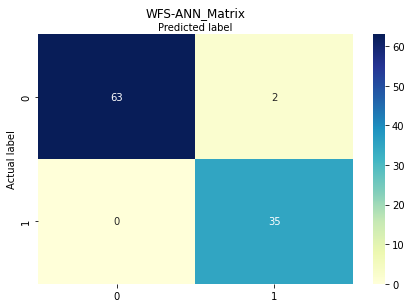

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True,cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('WFS-ANN_Matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('WFS-ANN_Matrix.png')
plt.show()

In [75]:
from google.colab import files
files.download('WFS-ANN_Matrix.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# from google.colab import files
# files.download('ann_Boruta_output.csv') 

###GRU

In [76]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [77]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [78]:
import time
start_time = time.time()
# The GRU architecture
model = Sequential()
# First GRU layer with Dropout regularisation
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
model.add(Dropout(0.2))
# Second GRU layer
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
model.add(Dropout(0.2))
# Third GRU layer
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
model.add(Dropout(0.2))
# Fourth GRU layer
model.add(GRU(units=50, activation='tanh'))
model.add(Dropout(0.2))
# The output layer
model.add(Dense(units=1))
# Compiling the RNN
model.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error', metrics = ['accuracy'])
# Fitting to the training set
model.fit(X_train,y_train,epochs=100,batch_size=150,validation_data=(X_test, y_test))
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


2/2 [==============================] - 8s 2s/step - loss: 0.3651 - accuracy: 0.6167 - val_loss: 0.2547 - val_accuracy: 0.6500
Epoch 2/100
2/2 [==============================] - 0s 152ms/step - loss: 0.2558 - accuracy: 0.6167 - val_loss: 0.2323 - val_accuracy: 0.6500
Epoch 3/100
2/2 [==============================] - 0s 166ms/step - loss: 0.2544 - accuracy: 0.5000 - val_loss: 0.2941 - val_accuracy: 0.3500
Epoch 4/100
2/2 [==============================] - 0s 141ms/step - loss: 0.2907 - accuracy: 0.3867 - val_loss: 0.2833 - val_accuracy: 0.3500
Epoch 5/100
2/2 [==============================] - 0s 147ms/step - loss: 0.2630 - accuracy: 0.4200 - val_loss: 0.2321 - val_accuracy: 0.6500
Epoch 6/100
2/2 [==============================] - 0s 140ms/step - loss: 0.2344 - accuracy: 0.6200 - val_loss: 0.2201 - val_accuracy: 0.6500
Epoch 7/100
2/2 [==============================] - 0s 155ms/step - loss: 0.2378 - accuracy: 0.6167 - val_loss: 0.2327 - val_accuracy: 0.6500
Epoch 8/100
2/2 [===========

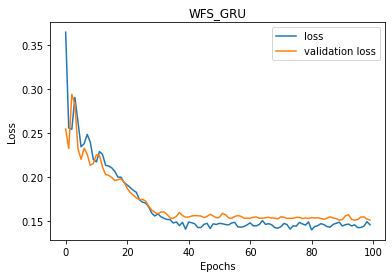

In [79]:
import matplotlib.pyplot as plt

fig = plt.gcf()
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('WFS_GRU')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.show()
fig.savefig('WFS_GRU.png', dpi=100)

In [80]:
from google.colab import files
files.download('WFS_GRU.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [81]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

4/4 [==============================] - 2s 12ms/step


In [82]:
from sklearn.metrics import classification_report,confusion_matrix

In [83]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87        65
           1       0.70      1.00      0.82        35

    accuracy                           0.85       100
   macro avg       0.85      0.88      0.85       100
weighted avg       0.90      0.85      0.85       100



In [84]:
print(confusion_matrix(y_test,predictions))

[[50 15]
 [ 0 35]]


In [85]:
cnf_matrix = [[50, 15],[0, 35]]

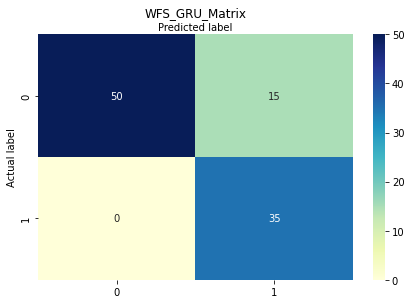

In [86]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True,cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('WFS_GRU_Matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('WFS_GRU_Matrix.png')
plt.show()

In [87]:
from google.colab import files
files.download('WFS_GRU_Matrix.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Simple RNN

In [95]:
dataset = pd.read_csv('drive/MyDrive/data_CKD_MI.csv')

In [96]:
# Data preprocessing
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [97]:
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import MinMaxScaler

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [99]:
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [100]:
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [101]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [102]:
# SimpleRNN model
import time
start_time = time.time()
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(X_train.shape[1],1), activation="relu"))
model.add(Dense(8, activation="relu")) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics = ['accuracy'])
model.fit(X_train,y_train, epochs=100, batch_size=16, verbose=2, validation_data=(X_test, y_test),)
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/100
19/19 - 2s - loss: 0.2289 - accuracy: 0.7067 - val_loss: 0.1302 - val_accuracy: 0.8800 - 2s/epoch - 80ms/step
Epoch 2/100
19/19 - 0s - loss: 0.1121 - accuracy: 0.8967 - val_loss: 0.0869 - val_accuracy: 0.9200 - 142ms/epoch - 7ms/step
Epoch 3/100
19/19 - 0s - loss: 0.0791 - accuracy: 0.9000 - val_loss: 0.0627 - val_accuracy: 0.9100 - 142ms/epoch - 7ms/step
Epoch 4/100
19/19 - 0s - loss: 0.0652 - accuracy: 0.9100 - val_loss: 0.0469 - val_accuracy: 0.9200 - 136ms/epoch - 7ms/step
Epoch 5/100
19/19 - 0s - loss: 0.0571 - accuracy: 0.9333 - val_loss: 0.0385 - val_accuracy: 0.9800 - 159ms/epoch - 8ms/step
Epoch 6/100
19/19 - 0s - loss: 0.0501 - accuracy: 0.9333 - val_loss: 0.0290 - val_accuracy: 0.9700 - 136ms/epoch - 7ms/step
Epoch 7/100
19/19 - 0s - loss: 0.0447 - accuracy: 0.9500 - val_loss: 0.0333 - val_accuracy: 0.9800 - 137ms/epoch - 7ms/step
Epoch 8/100
19/19 - 0s - loss: 0.0417 - accuracy: 0.9567 - val_loss: 0.0245 - val_accuracy: 0.9700 - 152ms/epoch - 8ms/step
Epoch 9/10

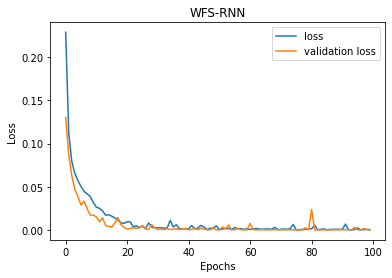

In [103]:
import matplotlib.pyplot as plt

fig = plt.gcf()
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('WFS-RNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.show()
fig.savefig('WFS-RNN.png', dpi=100)

In [104]:
from google.colab import files
files.download('WFS-RNN.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [105]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

4/4 [==============================] - 0s 7ms/step


In [106]:
from sklearn.metrics import classification_report,confusion_matrix

In [107]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        35

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [108]:
print(confusion_matrix(y_test,predictions))

[[65  0]
 [ 0 35]]


In [109]:
cnf_matrix = [[65, 0],[0, 35]]

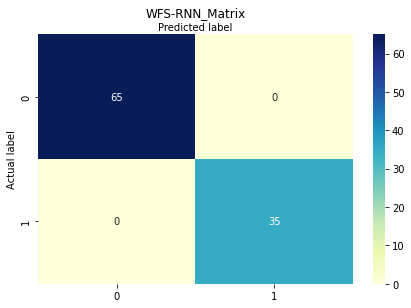

In [110]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True,cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('WFS-RNN_Matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('WFS-RNN_Matrix.png')
plt.show()

In [111]:
from google.colab import files
files.download('WFS-RNN_Matrix.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###MLP

In [112]:
dataset = pd.read_csv('drive/MyDrive/data_CKD_MI.csv')

# Data preprocessing
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [113]:
dataset = pd.read_csv('drive/MyDrive/data_CKD_MI.csv')

# Data preprocessing
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [117]:
import keras
import sklearn.model_selection

In [118]:
from keras.layers.normalization.layer_normalization import *
from keras.layers.normalization.batch_normalization import *

In [119]:
tf.keras.layers.experimental.preprocessing.Normalization

keras.layers.preprocessing.normalization.Normalization

In [122]:
import time
start_time = time.time()
model = keras.models.Sequential()
# model.add(keras.layers.normalization.BatchNormalization(input_shape=tuple([X_train.shape[1]])))
model.add(keras.layers.core.Dense(32, activation='relu'))
model.add(keras.layers.core.Dropout(rate=0.5))
# model.add(keras.layers.normalization.BatchNormalization())
model.add(keras.layers.core.Dense(32, activation='relu'))
model.add(keras.layers.core.Dropout(rate=0.5))
model.add(keras.layers.core.Dense(1, activation='sigmoid'))

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train,y_train,epochs=100,validation_data=(X_test, y_test))
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/100
10/10 [==============================] - 1s 22ms/step - loss: 0.7140 - accuracy: 0.5433 - val_loss: 0.6620 - val_accuracy: 0.6400
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.6832 - accuracy: 0.5800 - val_loss: 0.6323 - val_accuracy: 0.6500
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 0.6928 - accuracy: 0.5567 - val_loss: 0.6047 - val_accuracy: 0.6500
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6244 - accuracy: 0.6833 - val_loss: 0.5769 - val_accuracy: 0.6500
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 0.6166 - accuracy: 0.6467 - val_loss: 0.5483 - val_accuracy: 0.6700
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 0.5977 - accuracy: 0.6800 - val_loss: 0.5188 - val_accuracy: 0.8400
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5534 - accuracy: 0.7200 - val_loss: 0.4831 - val_accuracy: 0.9500
Epoch 8/100


###SVM

In [123]:
# Importing necessary libraries used for data cleaning, and data visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

# Ignoring ununnecessary warnings
import warnings
warnings.filterwarnings("ignore")

# Importing library to split the data into training part and testing part.
from sklearn.model_selection import train_test_split

# Chi Square
from sklearn.feature_selection import chi2
import scipy.stats as stats

# Importing library to process the data (Normalize the data)
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Importing Models (used for making prediction)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC                            # Support vector machine model
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

# Importing metrics used for evaluation of our models
from sklearn import metrics
from sklearn.metrics import classification_report

# Hyperparameter tuner and Cross Validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler

In [124]:
dataset = pd.read_csv('drive/MyDrive/data_CKD_MI.csv')

# Data preprocessing
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [125]:
def svm_grid_search(X, y):
    #create a dictionary of all values we want to test
    param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001, 0.4, 0.2, 0.8],'kernel': ['rbf', 'poly', 'sigmoid']}
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    svm = SVC()
    
    #use gridsearch to test all values
    svm_gscv = RandomizedSearchCV(estimator = svm,
                           param_distributions = param_grid,
                           scoring = 'accuracy',
                           cv = cv,
                           n_jobs = 2)
    #fit model to data
    svm_gscv.fit(X, y)
    
    return svm_gscv.best_params_

In [126]:
svm_grid_search(X_train, y_train)

{'kernel': 'rbf', 'gamma': 0.01, 'C': 100}

In [128]:
from sklearn import svm
svm = SVC(gamma=0.01, C=100, kernel='rbf', probability=True)

svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

print(metrics.classification_report(y_test, y_pred_svm))

0.9933333333333333
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        35

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

